# Noise cancellation 

Let's see another use case of PCA: noise reduction. In this exercise, we will need to classify handwritten digits. Unfortunately, the dataset is extremely noisy. Let's see how PCA can help us!

1. Import `pandas` and then download data from these two urls: 
    * images 👉👉 <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/PCA/noisy_digits.csv" target="_blank">Download</a>

    * labels 👉👉 <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/PCA/noisy_digits_labels.csv" target="_blank">Download</a>

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
images = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/PCA/noisy_digits.csv")
labels=pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/PCA/noisy_digits_labels.csv")

In [3]:
display(images)
display(labels)

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,-176.321245,-52.743850,143.604939,-53.567749,80.289381,20.686379,-197.423519,-229.401206,-221.900009,...,34.407070,1.950735,-25.095565,133.684095,-21.664094,-94.305438,-55.987821,-89.929231,40.394774,-214.754480
1,1,-158.421239,16.371695,62.810879,263.533916,-193.920320,-25.366668,107.062706,125.403427,83.536343,...,-5.419961,-123.584030,20.240434,-25.699206,-128.545930,52.525885,-54.214887,-133.842624,-30.141215,210.408665
2,2,-290.343750,81.586500,12.615232,146.567851,111.233602,-188.989259,-101.464605,-107.015195,-13.069827,...,-139.909318,-85.214133,167.495617,62.402411,-144.402970,152.263950,-4.687051,-59.270131,-93.193600,188.229794
3,3,-208.840590,136.190431,38.552191,-67.825346,24.316303,176.103673,31.581298,-163.582673,29.777077,...,-131.385192,40.329733,-10.111639,163.497435,41.010287,-21.408008,328.274235,-15.341672,121.570863,151.757537
4,4,-328.876288,-42.862900,174.651874,-228.833439,71.909654,-97.206392,48.048853,-34.071313,3.820465,...,-135.713199,-71.396796,155.237981,-141.860908,155.657335,166.609760,-52.911774,267.150703,-36.749672,131.913772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,41995,-193.715418,-121.055317,-47.201498,41.050010,275.268593,81.153157,-174.087117,219.320855,23.641371,...,-22.867966,-291.819073,-82.147882,137.773779,-72.174446,-78.036429,-4.125571,-99.386126,-59.523670,-148.240194
41996,41996,16.644166,-149.397247,-154.872496,-222.054111,-48.943347,-19.228871,-20.847262,0.414076,193.558068,...,-26.076300,129.247935,179.948461,57.081104,-152.773722,100.105530,182.045722,183.716333,-33.014323,-114.653462
41997,41997,-137.293206,-280.697152,-177.704894,224.618264,-5.735675,-59.081084,17.239577,-200.140062,25.964959,...,-124.788842,-289.137063,45.366184,-44.146243,-148.994209,-92.854252,-86.153870,-116.407319,-181.573578,91.530785
41998,41998,120.670250,-60.609717,-56.538574,-73.734513,39.947645,-45.941658,84.015198,-131.360772,-267.020326,...,57.272369,4.541028,-132.156557,28.058669,100.149738,-37.536355,-13.550537,-282.136177,-97.041014,-19.465637


,Unnamed: 0,label
0,0,1
1,1,0
2,2,1
3,3,4
4,4,0
...,...,...
41995,41995,0
41996,41996,1
41997,41997,7
41998,41998,6


2. Remove first columns of labels and images 

In [4]:
images =images.drop(['Unnamed: 0'],axis=1)
labels =labels.drop(['Unnamed: 0'],axis=1)

In [5]:
labels.value_counts()

label
1        4684
7        4401
3        4351
9        4188
2        4177
6        4137
0        4132
4        4072
8        4063
5        3795
dtype: int64

3. Visualize images by using `numpy` and `matplotlib`
>  *    You can use `.reshape()` of `numpy` 👉 images are 28x28 pixels 😉
>  *   You can also use `.imshow` from `matplotlib to visualize images 

In [6]:
images_reshape= images.values.reshape(42000, 28, 28)  #il faut que ça soir un np array

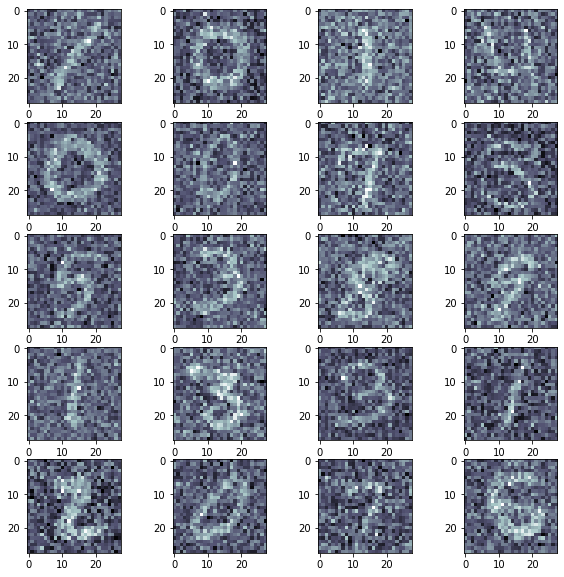

In [7]:

fig, ax = plt.subplots(5, 4, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_reshape[i], cmap='bone')
    #axi.set(xticks=[], yticks=[],xlabel=labels[i])

4. Use `train_test_split` from `sklearn` to split your dataset into a train and a test set.

In [8]:
from sklearn.model_selection import train_test_split

print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=0,)

print("...Done.")
print()

Dividing into train and test sets...
...Done.



5. Normalize your train set and apply your normalization on your test set. 

In [9]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

display(X_train)
display(X_test)

array([[ 0.05941189, -0.66006338,  0.50914581, ...,  0.6110693 ,
        -0.62541601,  0.55892742],
       [ 0.30462944, -0.07239049, -1.87888412, ..., -1.09532979,
        -0.54293099,  1.44916198],
       [-1.04870213,  1.02050297, -0.8446614 , ..., -0.60054372,
         0.80332734,  0.95305223],
       ...,
       [-0.24928451, -1.02597437, -0.65194231, ..., -0.27835664,
        -0.08080155,  0.75624561],
       [-0.51826768, -1.41096237, -0.00489003, ..., -0.39840221,
         0.91569792, -1.26188888],
       [ 0.71159682, -0.48956033, -0.57326204, ..., -0.13831535,
         0.10780635, -1.12949691]])

array([[-1.7862609 , -0.12772858, -0.86450726, ...,  0.81134792,
        -0.20424438, -0.1133787 ],
       [-1.60431054, -1.41701518, -0.7457514 , ...,  0.66970171,
         1.65309632,  1.08552987],
       [-0.43970082,  0.48625425,  0.1177875 , ..., -0.07899168,
         1.41172717, -0.22352155],
       ...,
       [-1.23994425, -0.89463042,  0.93219781, ...,  1.69410596,
         1.32592937,  0.61976888],
       [ 0.86050027, -1.43675161,  1.2832892 , ...,  0.99380585,
        -1.23824983,  0.33787958],
       [ 2.23097841,  0.58439846, -0.87252951, ...,  2.09518305,
         0.98434179, -2.94619659]])

6. Import `SVC` from `sklearn.svm` and apply it on your dataset. Check out scores. 

In [10]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,Y_train,)

display('the score on trian is',svc.score(X_train, Y_train))
print('\n')
display('the score on test is',svc.score(X_test,Y_test))

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


'the score on trian is'

0.984375

'the score on test is'

0.8864285714285715

7. Import `PCA` from `sklearn.decomposition` and apply it on your train set. 
> Keep only 15% of the explained variance 

In [11]:
# import PCA 
from sklearn.decomposition import PCA

# Instanciate PCA 
# We can even specify how many components we want within the class
pca = PCA(.15)

# Fit pca to our model 
PC = pca.fit_transform(X_train)
PCtest= pca.transform(X_test)

# Visualize first five rows
PC[:5]

array([[ 3.93509458,  2.70722049, -0.49566682,  6.93287769,  0.67237085,
         0.10616759,  0.1068065 ,  1.63867147, -0.8112742 ,  1.26633447,
        -1.75315732,  3.22031154,  2.83860219,  1.25834594,  0.38974414,
        -2.39863057,  0.36128396, -0.98666995,  0.50850245,  1.89374859,
         1.61669844,  1.52996807,  3.0314294 , -2.0169459 , -0.39463034,
         1.70548041,  0.04382207, -2.76281281,  0.79708237, -0.11908071,
         1.56155294],
       [ 7.17453219,  2.1538867 ,  0.75734089,  1.59475538, -0.37336525,
         1.39686832,  1.63167767, -0.35388021, -1.01731217,  3.37594141,
        -3.26411557,  0.76599158,  1.73716133, -2.11173392,  2.43413367,
        -2.96790108,  2.96275566,  0.73550047, -0.34407007, -0.67616245,
        -1.04335229,  0.49505862,  0.33019286, -0.25413063, -0.25513652,
         6.19222985,  0.58433785, -0.36592912,  1.12646822, -0.32680231,
        -0.63099169],
       [-1.05937883,  4.26989968,  3.80708272,  1.5743183 , -4.91547848,
       

8. Get the number of components 

In [12]:
PCtranspo = pd.DataFrame(data=pca.components_)   # valeur de tout les coefs de chaque X
PCtranspo.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.001468,-0.002555,-0.000554,-0.000533,0.000824,-0.000842,0.001470,-0.000131,0.002163,-0.002341,...,-0.000531,-0.000353,0.000171,0.001259,-0.001286,-0.001789,-0.002911,0.001578,0.001934,0.000990
1,0.000497,0.000288,0.002017,0.002235,0.001197,0.000728,-0.002423,-0.003390,0.000218,-0.001973,...,0.001539,0.004399,0.001608,-0.001854,-0.001837,-0.000624,-0.002021,0.000427,-0.002400,-0.000758
2,-0.002839,-0.002539,-0.001193,0.000258,0.000410,0.000535,-0.000509,0.003423,-0.000204,0.005334,...,0.000176,-0.001819,-0.001333,-0.001671,-0.000110,0.005007,0.001991,0.002508,0.001099,-0.001627
3,0.000722,0.002013,-0.000232,0.001039,-0.002463,-0.000421,-0.001504,0.003126,0.000138,0.000588,...,-0.000399,-0.000109,-0.000223,-0.000970,-0.001118,0.004758,0.000418,0.001915,0.002066,-0.003552
4,-0.002339,0.002742,-0.000195,-0.003153,0.001319,-0.001598,-0.001115,-0.000850,0.000870,-0.000796,...,0.000608,-0.001501,0.001178,0.003452,-0.000456,-0.006093,-0.000093,0.002282,-0.004327,-0.003267


In [13]:


# Use pca.explained_variance_ratio_
print("Explained Variance ration per PC: {}".format(pca.explained_variance_ratio_))

print("Total explained variance ratio: {}%".format(pca.explained_variance_ratio_.sum()))




Explained Variance ration per PC: [0.01781578 0.01268513 0.01151518 0.00986096 0.0089087  0.00793382
 0.00624478 0.00564741 0.00541693 0.0047467  0.00437915 0.00430694
 0.0036985  0.00362428 0.00357607 0.00329061 0.00318671 0.00304316
 0.00292304 0.0028142  0.00269486 0.00257371 0.00255529 0.0024424
 0.00237466 0.00233519 0.00229354 0.00225329 0.00217803 0.00214832
 0.00204919]
Total explained variance ratio: 0.1515165258291611%


9. Apply PCA on your test set

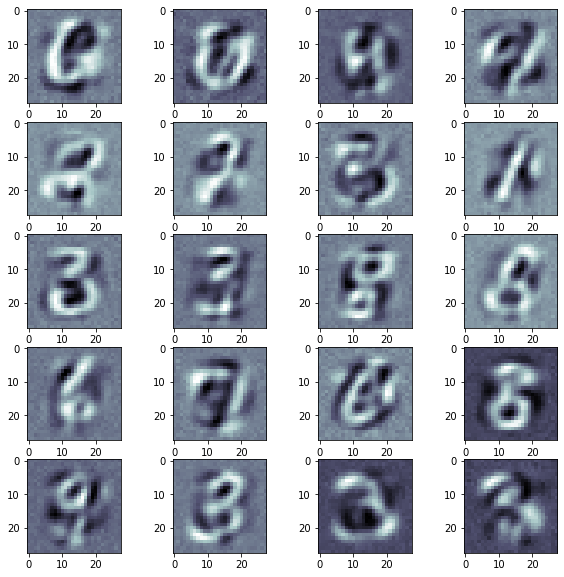

In [14]:

fig, ax = plt.subplots(5, 4, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(pca.inverse_transform(PC[i]).reshape(28,28), cmap='bone')
    #axi.set(xticks=[], yticks=[],xlabel=labels[i])

In [15]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(PC,Y_train,)

display('the score on trian is',svc.score(PC, Y_train))
print('\n')
display('the score on test is',svc.score(PCtest,Y_test))

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


'the score on trian is'

0.9666964285714286

'the score on test is'

0.9447619047619048

In [16]:
### Not only we improve accuracy but training took wayyy less time! 